# Project 2 #


## Installing and Loading Libraries ##

In [47]:
!pip install pandas
!pip install matlablib
!pip install seaborn
!pip install numpy

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('/Users/nafinvwich/Downloads/spring 2025/dataMining/project2/sleep_cycle_productivity.csv')
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


## Pre-Processing

In this datasets, 15 collumns and 5000 rows were reported. I plan to remove irrelevant ones. 

In [ ]:
df.info()
df= df.drop(columns=["Person_ID"])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Age                            5000 non-null   int64  
 2   Gender                         5000 non-null   object 
 3   Sleep Start Time               5000 non-null   float64
 4   Sleep End Time                 5000 non-null   float64
 5   Total Sleep Hours              5000 non-null   float64
 6   Sleep Quality                  5000 non-null   int64  
 7   Exercise (mins/day)            5000 non-null   int64  
 8   Caffeine Intake (mg)           5000 non-null   int64  
 9   Screen Time Before Bed (mins)  5000 non-null   int64  
 10  Work Hours (hrs/day)           5000 non-null   float64
 11  Productivity Score             5000 non-null   int64  
 12  Mood Score                     5000 non-null   i

KeyError: "['Person_ID'] not found in axis"

In [51]:
df.describe()
df.isnull().sum()

Date                             0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

## Demographics ##

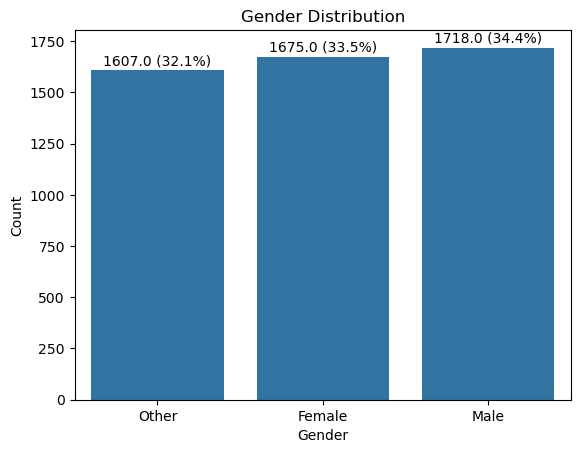

In [107]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotating count and percentage
total_count = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = 100 * height / total_count
    plt.text(p.get_x() + p.get_width() / 2., height + 10, f'{height} ({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10)
    




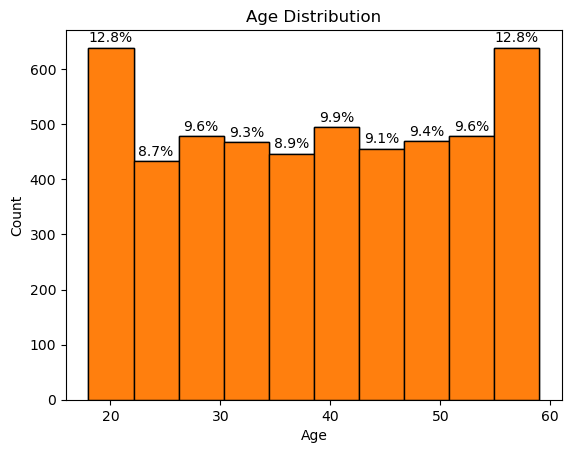

In [108]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

n, bins, patches = plt.hist(df['Age'], bins=10, edgecolor='black')  # Blue color and black edge
for i in range(len(patches)):
    height = patches[i].get_height()
    bin_left = bins[i]
    bin_right = bins[i+1]
    percentage = 100 * height / len(df)
    plt.text((bin_left + bin_right) / 2, height + 5, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.show()


## Sleep Data & Lifestyle ##

Sleep Quality 1:
  Mean: 5.65
  Median: 6.00
  Mode: 9.00

Sleep Quality 2:
  Mean: 5.73
  Median: 6.00
  Mode: 6.00

Sleep Quality 3:
  Mean: 5.66
  Median: 6.00
  Mode: 8.00

Sleep Quality 4:
  Mean: 5.32
  Median: 5.00
  Mode: 4.00

Sleep Quality 5:
  Mean: 5.81
  Median: 6.00
  Mode: 9.00

Sleep Quality 6:
  Mean: 5.79
  Median: 6.00
  Mode: 9.00

Sleep Quality 7:
  Mean: 5.65
  Median: 6.00
  Mode: 6.00

Sleep Quality 8:
  Mean: 5.65
  Median: 6.00
  Mode: 10.00

Sleep Quality 9:
  Mean: 5.46
  Median: 5.00
  Mode: 4.00

Sleep Quality 10:
  Mean: 5.72
  Median: 6.00
  Mode: 9.00



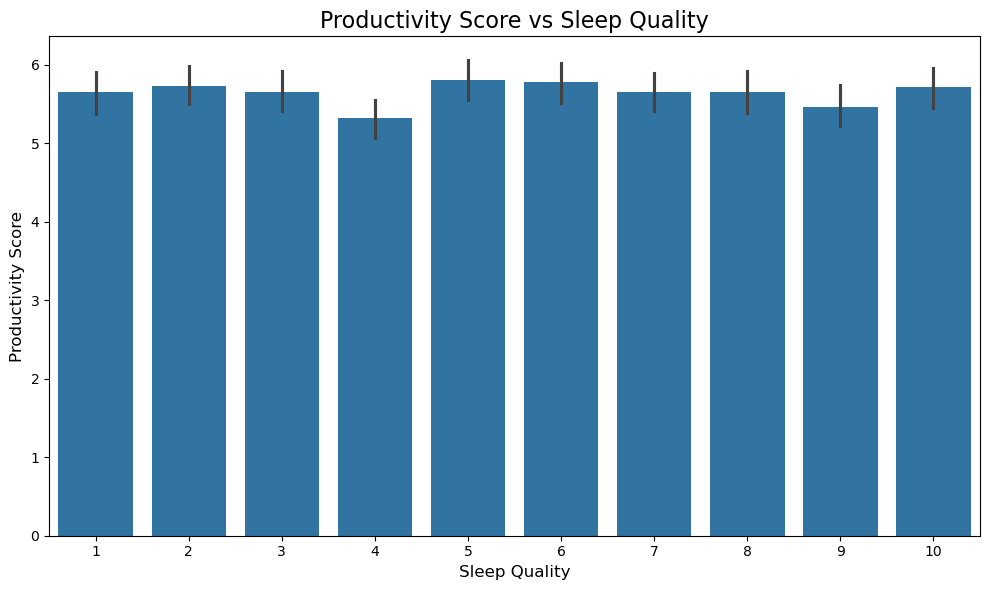

In [123]:
sleep_quality_stats = df.groupby('Sleep Quality')['Productivity Score'].agg(['mean', 'median', lambda x: x.mode()[0]])


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sleep Quality', y='Productivity Score', data=df)


ax.set_title('Productivity Score vs Sleep Quality', fontsize=16)
ax.set_xlabel('Sleep Quality', fontsize=12)
ax.set_ylabel('Productivity Score', fontsize=12)

for i in range(len(sleep_quality_stats)):
    sleep_quality = sleep_quality_stats.index[i]
    mean_val = sleep_quality_stats.loc[sleep_quality, 'mean']
    median_val = sleep_quality_stats.loc[sleep_quality, 'median']
    mode_val = sleep_quality_stats.loc[sleep_quality, '<lambda_0>']  # This is the mode value
    
 
    print(f"Sleep Quality {sleep_quality}:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val:.2f}")
    print()

# Show the plot
plt.tight_layout()
plt.show()


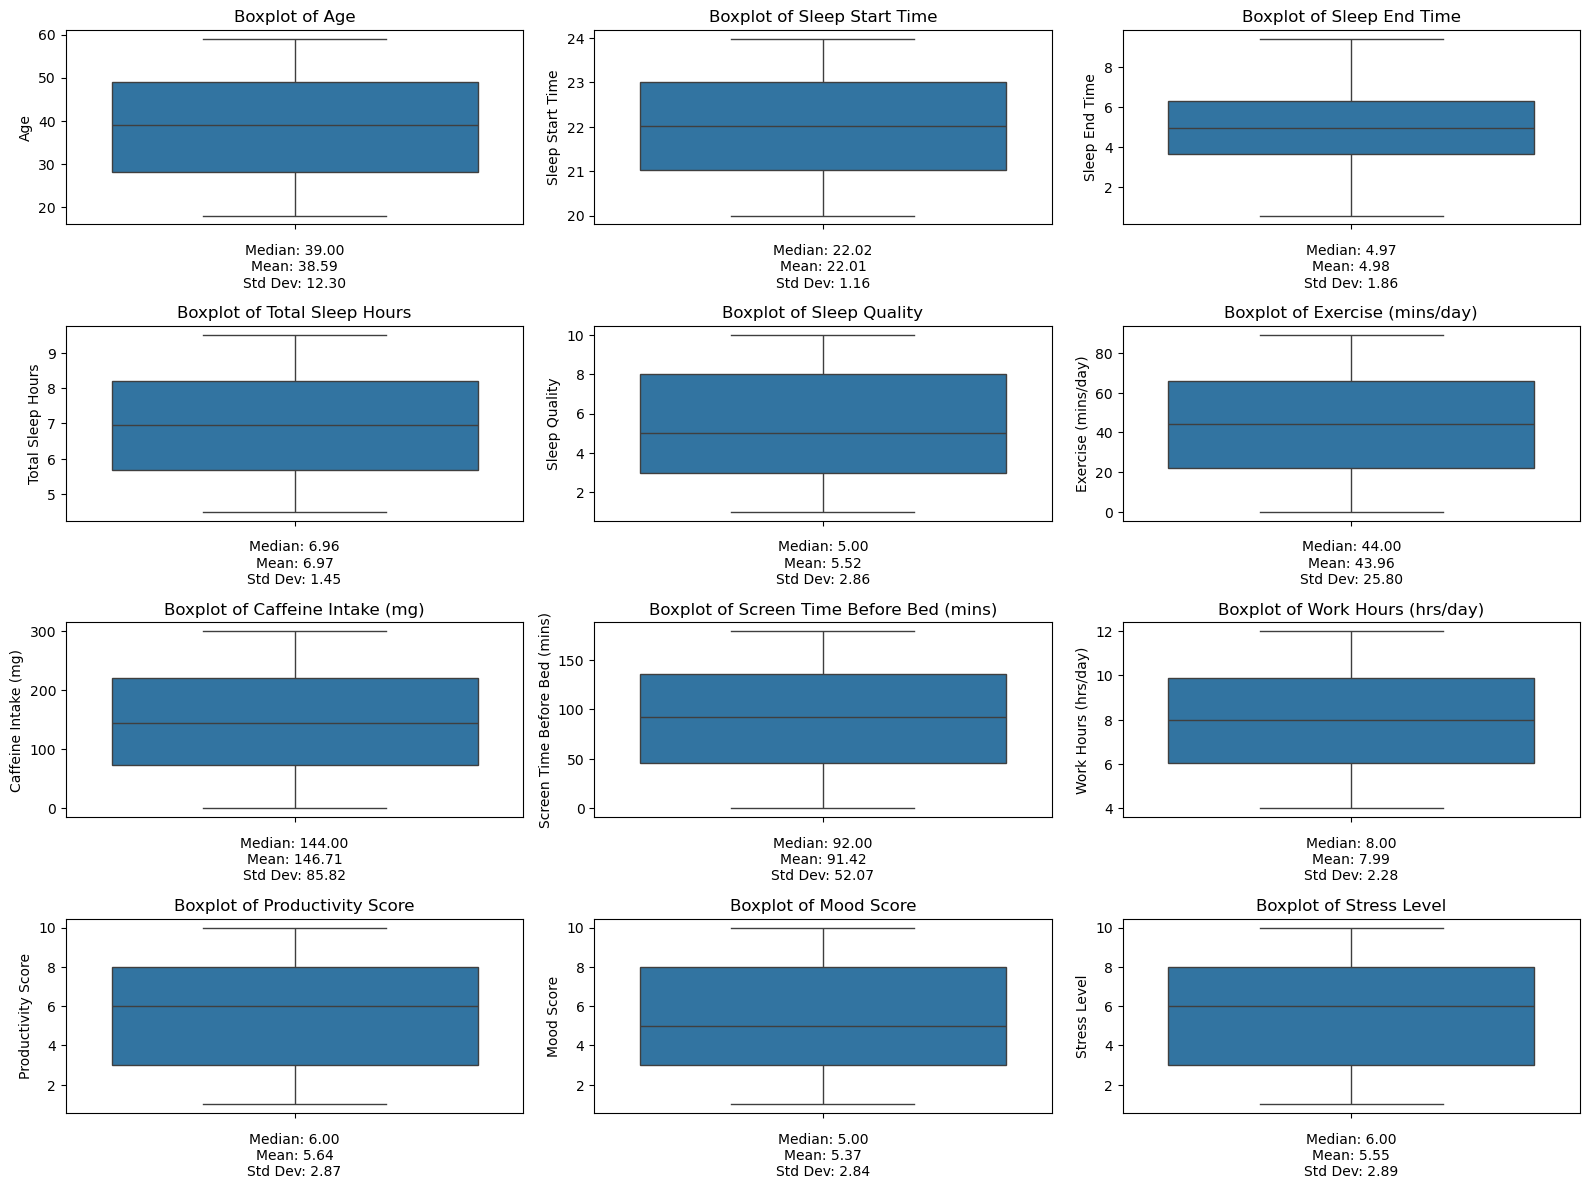

In [ ]:

features = ['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality', 
            'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
            'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score', 'Stress Level']

plt.figure(figsize=(16, 12))

# Iterate through features and plot boxplots
for i, col in enumerate(features, 1):
    ax = plt.subplot(4, 3, i)
    
    # Plot boxplot
    sns.boxplot(y=df[col])
    
    # Calculate statistics
    median = np.median(df[col])
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Display statistics below the boxplot
    ax.text(0.5, -0.1, f'Median: {median:.2f}\nMean: {mean:.2f}\nStd Dev: {std:.2f}', 
            ha='center', va='top', transform=ax.transAxes, fontsize=10)

    # Title for each plot
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel('')  # Optional: hide x-axis label

plt.tight_layout()
plt.show()



## Modeling ##

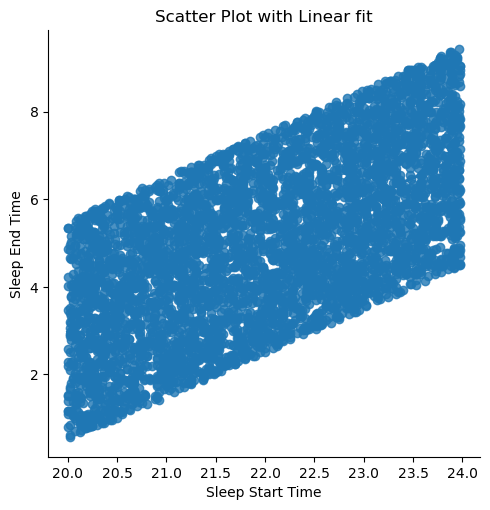

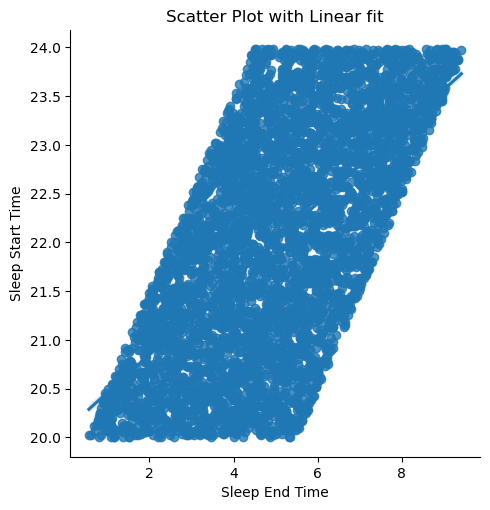

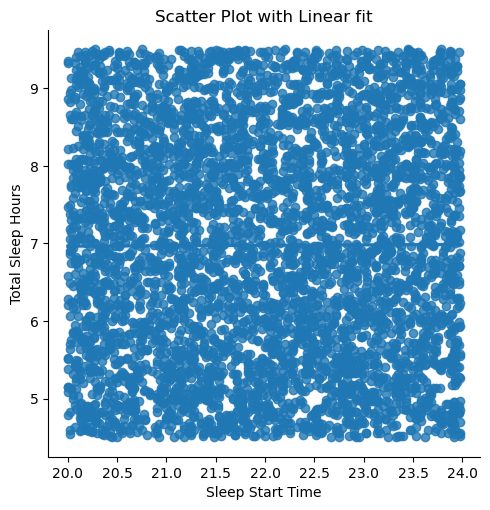

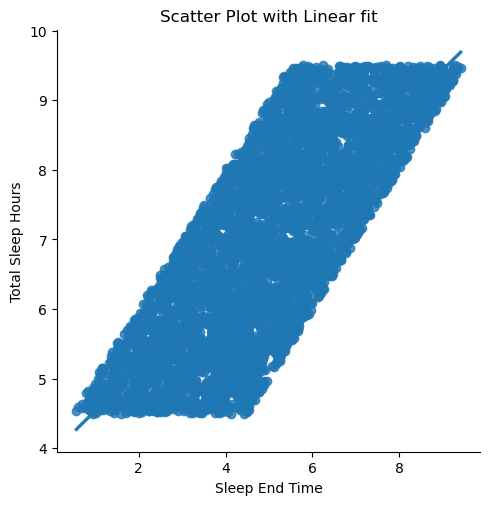

In [130]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='Sleep Start Time', y='Sleep End Time', data=df)
plt.title("Scatter Plot with Linear fit")
plt.show()

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='Sleep End Time', y='Sleep Start Time', data=df)
plt.title("Scatter Plot with Linear fit")
plt.show()

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='Sleep Start Time', y='Total Sleep Hours', data=df)
plt.title("Scatter Plot with Linear fit")
plt.show()

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='Sleep End Time', y='Total Sleep Hours', data=df)
plt.title("Scatter Plot with Linear fit")
plt.show()

In [186]:
features = ['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours', 
            'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
            'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Gender', 
            'Mood Score', 'Stress Level']



In [188]:
X = df[features]  # Feature columns
y = df['Productivity Score']
X.columns


Index(['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours',
       'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Gender',
       'Mood Score', 'Stress Level'],
      dtype='object')

In [202]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X.drop(columns=['Gender'])),
    columns=X.drop(columns=['Gender']).columns
)

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_gender = pd.DataFrame(
    encoder.fit_transform(X[['Gender']]),
    columns=encoder.get_feature_names_out(['Gender'])
)

X_scaled = pd.concat([X_scaled, encoded_gender], axis=1)

print(X_scaled.head())


        Age  Sleep Start Time  Sleep End Time  Total Sleep Hours  \
0 -0.535753          1.144430       -0.198817          -1.165773   
1  0.195861         -0.851292       -1.369399          -1.076357   
2 -1.511238          0.081773       -0.821696          -1.117626   
3 -0.129301          0.945722        0.896590           0.395559   
4  0.602313         -0.505713       -0.435082          -0.154690   

   Sleep Quality  Exercise (mins/day)  Caffeine Intake (mg)  \
0      -0.880303             1.629612             -0.695752   
1      -0.181872            -0.463739             -1.464778   
2       0.516560            -1.045226             -0.684100   
3       0.865776             0.078981             -1.313304   
4       1.564208             0.660468              1.424896   

   Screen Time Before Bed (mins)  Work Hours (hrs/day)  Mood Score  \
0                       0.471998              0.360819   -0.836043   
1                      -0.065699             -0.728647   -0.836043   
2 

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [234]:

median_productivity = df['Productivity Score'].median()
df['High_Productivity'] = (df['Productivity Score'] >= median_productivity).astype(int)

# Select features and target for modeling
# We drop columns that are identifiers or less relevant, like Date and Person_ID
feature_cols = ['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours',
                'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)',
                'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Mood Score', 'Stress Level']

# Check if feature columns exist after renaming
print('Model features:', feature_cols)

X = df[feature_cols].copy()
y = df['High_Productivity']

# Handle missing values if any (for simplicity, we fill with the median)
X = X.fillna(X.median())

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy score and display it
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

Model features: ['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Mood Score', 'Stress Level']
Accuracy Score: 0.502


In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nResults for {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")


Results for Linear Regression:
MSE: 0.2482
RMSE: 0.4982
MAE: 0.4974
R2 Score: 0.0033

Results for Random Forest:
MSE: 0.2596
RMSE: 0.5095
MAE: 0.5009
R2 Score: -0.0424

Results for Support Vector Machine:
MSE: 0.3307
RMSE: 0.5751
MAE: 0.4775
R2 Score: -0.3280


In [243]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC()
}

accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

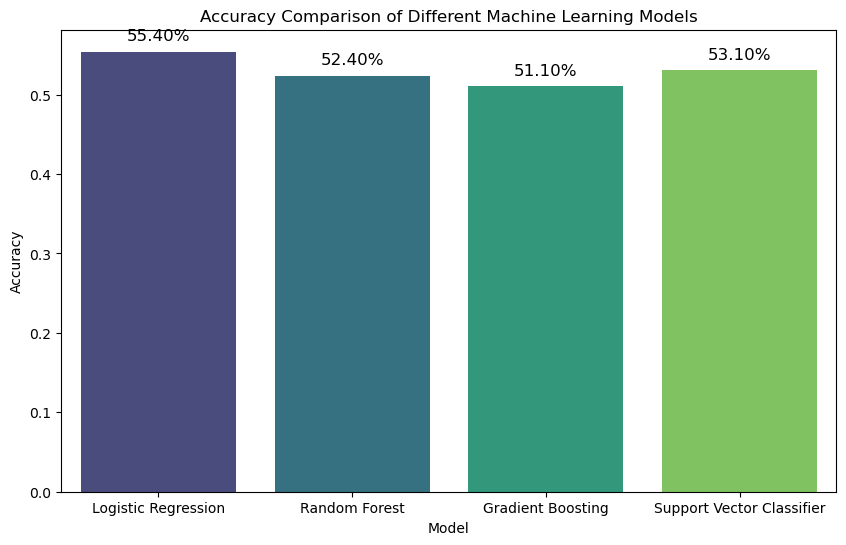

In [244]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')

# Adding accuracy percentage labels on top of each bar
for i, score in enumerate(accuracy_scores.values()):
    plt.text(i, score + 0.01, f'{score * 100:.2f}%', ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Accuracy Comparison of Different Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()